#### Задача
Сгенерируйте граф в модели копирования с $n=10\,000$ вершинами при $d=1$ и $\alpha=1/4.$ В $\log$-координатах постройте распределение входящих степеней полученного графа и его теоретическую оценку.
Постройте распределение входящих степеней графа в данной модели в случае $d=5$.

In [1]:
import networkx as nx
import random

def generate_copying_model_graph(n, d, alpha, G0):
    G = G0.copy()
    while G.order() < n:
        # вершина для копирования ссылок
        p = random.choice(G.nodes())
        # концы новых ребер из новой вершины:
        destinations = []
        for i in xrange(d):
            if random.random() < alpha:
                # выбираем случайный конец ребра
                destination = random.choice(G.nodes())
            else:
                # копируем конец i-ого ребра у вершины p:
                destination = G.out_edges(p)[i][1]
            destinations.append(destination)
        new_node = G.order()
        for dest in destinations:
            G.add_edge(new_node, destination)
    return G    

In [2]:
G0 = nx.MultiDiGraph()
G0.add_edge(0, 0)
G = generate_copying_model_graph(10000, 1, 0.25, G0)

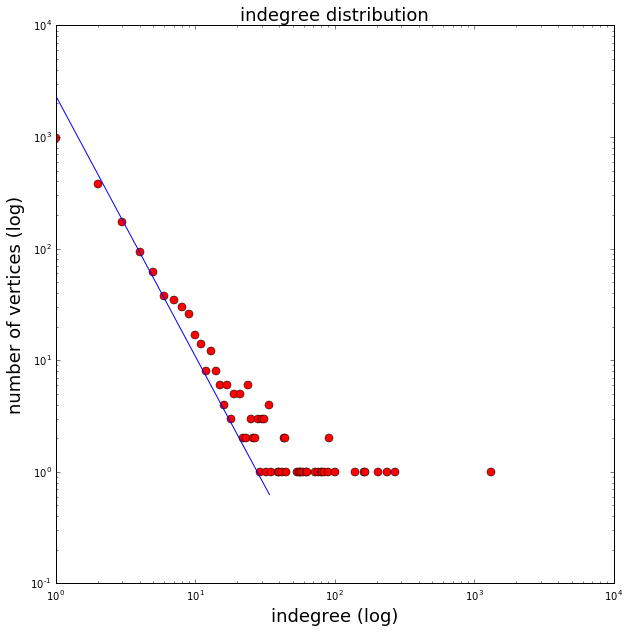

In [100]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
from collections import Counter
pylab.rcParams['figure.figsize'] = 10, 10

degrees = Counter(G.in_degree().values())
sorted_degree_values = sorted(G.in_degree().keys())
counts = [degrees[d] for d in sorted_degree_values]
plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)
plt.loglog(sorted_degree_values[1:35], [ 2343.7014928 / r ** (7. / 3) for r in sorted_degree_values[1:35]])
plt.xlabel("indegree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("indegree distribution", fontsize=18)
plt.show()

In [97]:
from scipy.optimize import curve_fit
import numpy as np
def func(d, c):
    return float(c) / ( d ** (7/3.) )

xdata = np.array(sorted_degree_values[3:20])
ydata = np.array(counts[3:20])
popt, pcov = curve_fit(func, xdata, ydata)
print popt

[ 2343.7014928]


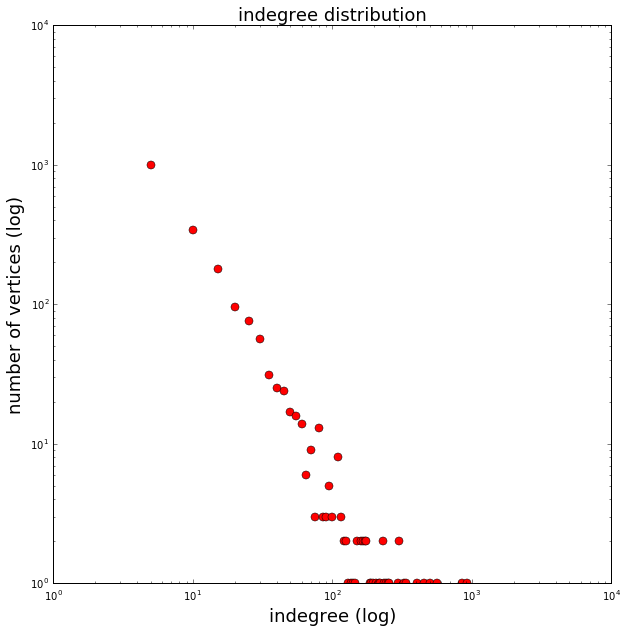

In [102]:
G0 = nx.MultiDiGraph()
G0.add_edge(0, 0)
G0.add_edge(0, 0)
G0.add_edge(0, 0)
G0.add_edge(0, 0)
G0.add_edge(0, 0)
G = generate_copying_model_graph(10000, 5, 0.25, G0)
degrees = Counter(G.in_degree().values())
sorted_degree_values = sorted(G.in_degree().keys())
counts = [degrees[d] for d in sorted_degree_values]
plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)
plt.xlabel("indegree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("indegree distribution", fontsize=18)
plt.show()